<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/DistanceCorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #นำเข้าข้อมูลจาก drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project'# ชี้ dirve ที่เราต้องการ
import missingno as mno
import missingno as msno
from sklearn import linear_model
%matplotlib inline
import matplotlib
import sklearn 
from sklearn.impute import KNNImputer
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
import sklearn.preprocessing as skl

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv(os.path.join(path, 'df_control.csv'))

In [10]:
data


,Unnamed: 0,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


In [33]:
data.drop(['Unnamed: 0'],1,inplace= True)
data

<ipython-input-33-c1ba401941ec>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Unnamed: 0'],1,inplace= True)


,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,0.085409,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,0.156584,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,0.167260,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,0.199288,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,0.437722,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,0.483986,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,0.387900,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,0.213523,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,0.231317,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


In [67]:
data.rename(columns={'telomere length (kb)':'telomerelength','Fat Mass':'FatMass',
                     '% Body fat':'Bodyfat','waist to hip radio':'WHR','abdominal circumference':'AC',
                     'visceral fat area':'visceralfatarea','Uric Acid':'UricAcid','HDL-C':'HDL','Alkaline Phos':'AlkalinePhos'},inplace=True)
data

,Sex,AgeSYear,telomerelength,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,UricAcid,Cholesterol,Triglyceride,HDL,LDL,AST,ALT,AlkalinePhos,HbA1c
0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,0.085409,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,0.156584,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,0.167260,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,0.199288,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,0.437722,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,0.483986,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,0.387900,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,0.213523,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,0.231317,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


## Pearson

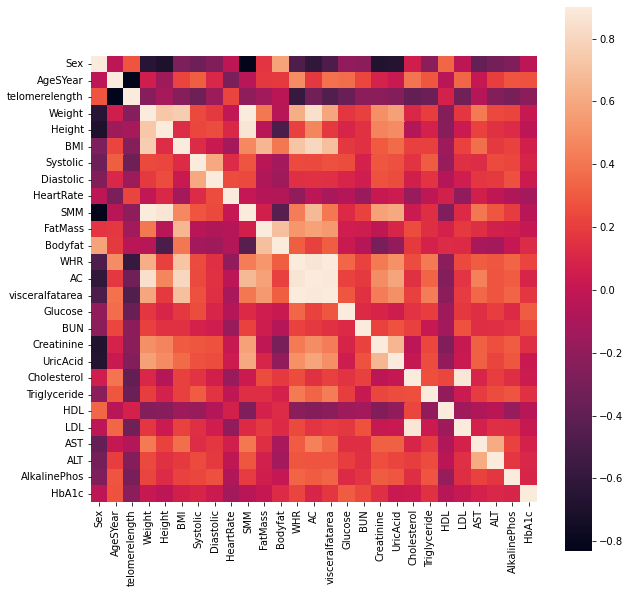

In [68]:
PearsonCorr = data.corr(method="pearson")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmax=.9, square=True)

In [69]:
PearsonCorr

,Sex,AgeSYear,telomerelength,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,UricAcid,Cholesterol,Triglyceride,HDL,LDL,AST,ALT,AlkalinePhos,HbA1c
Sex,1.000000,-0.029260,0.278319,-0.644668,-0.696069,-0.278723,-0.342111,-0.263445,-0.025949,-0.819951,...,-0.675167,-0.667079,0.056474,-0.221043,0.339457,-0.024699,-0.382304,-0.310449,-0.275800,-0.029247
AgeSYear,-0.029260,1.000000,-0.830271,0.059686,-0.142814,0.226248,0.312682,0.105280,-0.290218,-0.041900,...,0.083662,0.027366,0.394814,0.290569,-0.040627,0.342393,0.013716,0.201022,0.278321,0.277704
telomerelength,0.278319,-0.830271,1.000000,-0.248785,-0.120277,-0.246779,-0.349343,-0.160975,0.229754,-0.205782,...,-0.218384,-0.251050,-0.384913,-0.351910,0.076181,-0.328036,-0.062585,-0.254566,-0.301833,-0.225012
Weight,-0.644668,0.059686,-0.248785,1.000000,0.735639,0.763695,0.241736,0.189577,-0.007603,0.895663,...,0.497824,0.566576,0.112030,0.200312,-0.251662,0.171774,0.417993,0.237777,0.229586,0.017884
Height,-0.696069,-0.142814,-0.120277,0.735639,1.000000,0.130896,0.231439,0.256862,0.109474,0.870139,...,0.454602,0.486314,-0.053806,0.081116,-0.238330,0.029132,0.221837,0.152512,0.125192,-0.029690
BMI,-0.278723,0.226248,-0.246779,0.763695,0.130896,1.000000,0.129324,0.026324,-0.121686,0.473255,...,0.299797,0.361265,0.210463,0.213018,-0.147651,0.222539,0.373524,0.189648,0.223667,0.066361
Systolic,-0.342111,0.312682,-0.349343,0.241736,0.231439,0.129324,1.000000,0.605218,0.123309,0.282650,...,0.287627,0.270682,0.157181,0.305503,-0.172750,0.144880,0.133009,0.245791,0.236695,0.093611
Diastolic,-0.263445,0.105280,-0.160975,0.189577,0.256862,0.026324,0.605218,1.000000,0.256844,0.242727,...,0.274069,0.251623,0.065905,0.159468,-0.065343,0.048907,0.171730,0.187049,0.268584,0.031906
HeartRate,-0.025949,-0.290218,0.229754,-0.007603,0.109474,-0.121686,0.123309,0.256844,1.000000,0.002771,...,0.017749,0.038591,-0.163623,-0.018391,0.069017,-0.200085,0.063495,-0.014809,-0.086672,-0.121307
SMM,-0.819951,-0.041900,-0.205782,0.895663,0.870139,0.473255,0.282650,0.242727,0.002771,1.000000,...,0.572739,0.603476,0.033595,0.140640,-0.270640,0.117130,0.409804,0.289840,0.195238,-0.040918


## Distance correlation

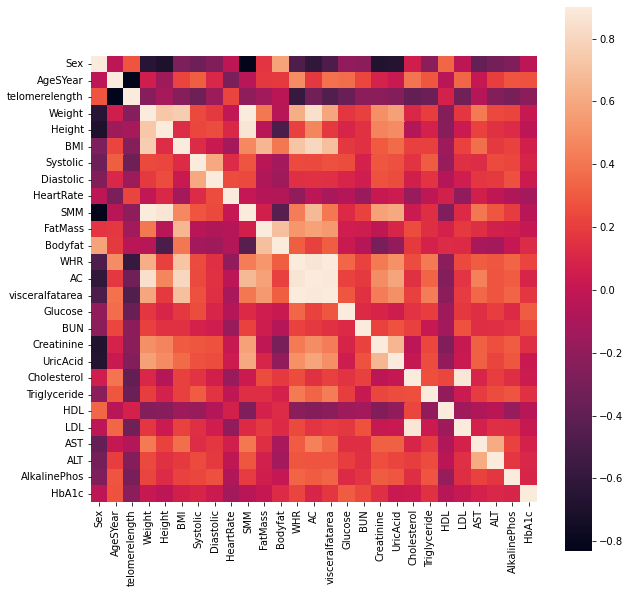

In [65]:
DistanceCorr = pd.DataFrame([[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,
                             [0.00]*27,[0.00]*27,[0.00]*27,[0.00]*7,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,[0.00]*27,
                             [0.00]*27],
                             columns=['Sex','AgeSYear','telomerelength','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','FatMass','Bodyfat','WHR','AC','visceralfatarea','Glucose','BUN',
                                      'Creatinine','UricAcid','Cholesterol','Triglyceride','HDL','LDL','AST','ALT','AlkalinePhos','HbA1c'],
                            index=['Sex','AgeSYear','telomerelength','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','FatMass','Bodyfat','WHR','AC','visceralfatarea','Glucose','BUN',
                                   'Creatinine','UricAcid','Cholesterol','Triglyceride','HDL','LDL','AST','ALT','AlkalinePhos','HbA1c'])

for i in range(0,27):
    DistanceCorr.Sex[i] = -distance.correlation(data['Sex'],data[DistanceCorr.iloc[:, [i]].columns]) + 1 
    DistanceCorr.AgeSYear[i] = -distance.correlation(data['AgeSYear'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.telomerelength[i] = -distance.correlation(data['telomerelength'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Weight[i] = -distance.correlation(data['Weight'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Height[i] = -distance.correlation(data['Height'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.BMI[i] = -distance.correlation(data['BMI'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Systolic[i] = -distance.correlation(data['Systolic'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Diastolic[i] = -distance.correlation(data['Diastolic'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.HeartRate[i] = -distance.correlation(data['HeartRate'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.SMM[i] = -distance.correlation(data['SMM'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.FatMass[i] = -distance.correlation(data['FatMass'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Bodyfat[i] = -distance.correlation(data['Bodyfat'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.WHR[i] = -distance.correlation(data['WHR'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.AC[i] = -distance.correlation(data['AC'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.visceralfatarea[i] = -distance.correlation(data['visceralfatarea'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Glucose[i] = -distance.correlation(data['Glucose'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.BUN[i] = -distance.correlation(data['BUN'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Creatinine[i] = -distance.correlation(data['Creatinine'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.UricAcid[i] = -distance.correlation(data['UricAcid'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Cholesterol[i] = -distance.correlation(data['Cholesterol'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.Triglyceride[i] = -distance.correlation(data['Triglyceride'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.HDL[i] = -distance.correlation(data['HDL'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.LDL[i] = -distance.correlation(data['LDL'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.AST[i] = -distance.correlation(data['AST'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.ALT[i] = -distance.correlation(data['ALT'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.AlkalinePhos[i] = -distance.correlation(data['AlkalinePhos'],data[DistanceCorr.iloc[:, [i]].columns]) + 1
    DistanceCorr.HbA1c[i] = -distance.correlation(data['HbA1c'],data[DistanceCorr.iloc[:, [i]].columns]) + 1


matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(DistanceCorr, vmax=.9, square=True)

In [66]:
DistanceCorr

,Sex,AgeSYear,telomerelength,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,UricAcid,Cholesterol,Triglyceride,HDL,LDL,AST,ALT,AlkalinePhos,HbA1c
Sex,1.000000,-0.029260,0.278319,-0.644668,-0.696069,-0.278723,-0.342111,-0.263445,-0.025949,-0.819951,...,-0.675167,-0.667079,0.056474,-0.221043,0.339457,-0.024699,-0.382304,-0.310449,-0.275800,-0.029247
AgeSYear,-0.029260,1.000000,-0.830271,0.059686,-0.142814,0.226248,0.312682,0.105280,-0.290218,-0.041900,...,0.083662,0.027366,0.394814,0.290569,-0.040627,0.342393,0.013716,0.201022,0.278321,0.277704
telomerelength,0.278319,-0.830271,1.000000,-0.248785,-0.120277,-0.246779,-0.349343,-0.160975,0.229754,-0.205782,...,-0.218384,-0.251050,-0.384913,-0.351910,0.076181,-0.328036,-0.062585,-0.254566,-0.301833,-0.225012
Weight,-0.644668,0.059686,-0.248785,1.000000,0.735639,0.763695,0.241736,0.189577,-0.007603,0.895663,...,0.497824,0.566576,0.112030,0.200312,-0.251662,0.171774,0.417993,0.237777,0.229586,0.017884
Height,-0.696069,-0.142814,-0.120277,0.735639,1.000000,0.130896,0.231439,0.256862,0.109474,0.870139,...,0.454602,0.486314,-0.053806,0.081116,-0.238330,0.029132,0.221837,0.152512,0.125192,-0.029690
BMI,-0.278723,0.226248,-0.246779,0.763695,0.130896,1.000000,0.129324,0.026324,-0.121686,0.473255,...,0.299797,0.361265,0.210463,0.213018,-0.147651,0.222539,0.373524,0.189648,0.223667,0.066361
Systolic,-0.342111,0.312682,-0.349343,0.241736,0.231439,0.129324,1.000000,0.605218,0.123309,0.282650,...,0.287627,0.270682,0.157181,0.305503,-0.172750,0.144880,0.133009,0.245791,0.236695,0.093611
Diastolic,-0.263445,0.105280,-0.160975,0.189577,0.256862,0.026324,0.605218,1.000000,0.256844,0.242727,...,0.274069,0.251623,0.065905,0.159468,-0.065343,0.048907,0.171730,0.187049,0.268584,0.031906
HeartRate,-0.025949,-0.290218,0.229754,-0.007603,0.109474,-0.121686,0.123309,0.256844,1.000000,0.002771,...,0.017749,0.038591,-0.163623,-0.018391,0.069017,-0.200085,0.063495,-0.014809,-0.086672,-0.121307
SMM,-0.819951,-0.041900,-0.205782,0.895663,0.870139,0.473255,0.282650,0.242727,0.002771,1.000000,...,0.572739,0.603476,0.033595,0.140640,-0.270640,0.117130,0.409804,0.289840,0.195238,-0.040918


## corr basic

In [70]:
data.corr()

,Sex,AgeSYear,telomerelength,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,UricAcid,Cholesterol,Triglyceride,HDL,LDL,AST,ALT,AlkalinePhos,HbA1c
Sex,1.000000,-0.029260,0.278319,-0.644668,-0.696069,-0.278723,-0.342111,-0.263445,-0.025949,-0.819951,...,-0.675167,-0.667079,0.056474,-0.221043,0.339457,-0.024699,-0.382304,-0.310449,-0.275800,-0.029247
AgeSYear,-0.029260,1.000000,-0.830271,0.059686,-0.142814,0.226248,0.312682,0.105280,-0.290218,-0.041900,...,0.083662,0.027366,0.394814,0.290569,-0.040627,0.342393,0.013716,0.201022,0.278321,0.277704
telomerelength,0.278319,-0.830271,1.000000,-0.248785,-0.120277,-0.246779,-0.349343,-0.160975,0.229754,-0.205782,...,-0.218384,-0.251050,-0.384913,-0.351910,0.076181,-0.328036,-0.062585,-0.254566,-0.301833,-0.225012
Weight,-0.644668,0.059686,-0.248785,1.000000,0.735639,0.763695,0.241736,0.189577,-0.007603,0.895663,...,0.497824,0.566576,0.112030,0.200312,-0.251662,0.171774,0.417993,0.237777,0.229586,0.017884
Height,-0.696069,-0.142814,-0.120277,0.735639,1.000000,0.130896,0.231439,0.256862,0.109474,0.870139,...,0.454602,0.486314,-0.053806,0.081116,-0.238330,0.029132,0.221837,0.152512,0.125192,-0.029690
BMI,-0.278723,0.226248,-0.246779,0.763695,0.130896,1.000000,0.129324,0.026324,-0.121686,0.473255,...,0.299797,0.361265,0.210463,0.213018,-0.147651,0.222539,0.373524,0.189648,0.223667,0.066361
Systolic,-0.342111,0.312682,-0.349343,0.241736,0.231439,0.129324,1.000000,0.605218,0.123309,0.282650,...,0.287627,0.270682,0.157181,0.305503,-0.172750,0.144880,0.133009,0.245791,0.236695,0.093611
Diastolic,-0.263445,0.105280,-0.160975,0.189577,0.256862,0.026324,0.605218,1.000000,0.256844,0.242727,...,0.274069,0.251623,0.065905,0.159468,-0.065343,0.048907,0.171730,0.187049,0.268584,0.031906
HeartRate,-0.025949,-0.290218,0.229754,-0.007603,0.109474,-0.121686,0.123309,0.256844,1.000000,0.002771,...,0.017749,0.038591,-0.163623,-0.018391,0.069017,-0.200085,0.063495,-0.014809,-0.086672,-0.121307
SMM,-0.819951,-0.041900,-0.205782,0.895663,0.870139,0.473255,0.282650,0.242727,0.002771,1.000000,...,0.572739,0.603476,0.033595,0.140640,-0.270640,0.117130,0.409804,0.289840,0.195238,-0.040918
